<a href="https://colab.research.google.com/github/kvishnu78/ML-Algorithms/blob/main/Regression_Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

upoading dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving winequalityN.csv to winequalityN.csv


Import Section

In [ ]:
import pandas as pd #to read from excel
import numpy as np
from sklearn.model_selection import train_test_split#to split training and testing sample
from sklearn.preprocessing import Normalizer#to Normalise the data
from sklearn.preprocessing import StandardScaler#to Standardise the data
from sklearn.linear_model import LogisticRegression#for Logistic regression
from sklearn.linear_model import LinearRegression#for linear regression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [ ]:
dataset=pd.read_csv("winequalityN.csv")#loading the dataset
dataset.isnull().sum()#checking for null values

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
dataset.update(dataset.fillna(dataset.median()))#removing the numerical null values using mean value, and fillna is used to fill empty values
dataset.isnull().sum()#rechecking number of empty cells

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

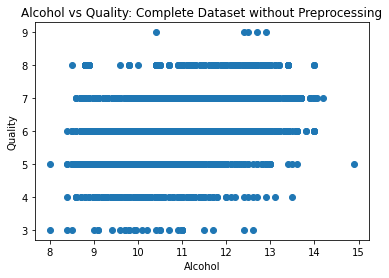

In [ ]:
features = ['alcohol']#A simple linear regression model to visualise the plot
x=dataset[features]
y=dataset['quality'] 
plt.scatter(x,y)  
plt.title('Alcohol vs Quality: Complete Dataset without Preprocessing')  
plt.xlabel('Alcohol')  
plt.ylabel('Quality')  
plt.show()

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.10,random_state=3,shuffle=True)#to divide into random test and train samples,
#  .10 indicates 10% data for testing, random state=3 is used to control the shuffles and reproduce the splits,shuffle indiactes shuffle the data before splitting

Data Preprocessing

In [ ]:
#Data Standardisation
std=StandardScaler()
train_xs=std.fit_transform(train_x)
test_xs=std.fit_transform(test_x)
#Data Normalisation
norm=Normalizer()
train_xn=std.fit_transform(train_x)
test_xn=std.fit_transform(test_x)


With Original data:
Mean Squared error =  0.63342 
Mean Absolute Error =  0.62873
Equation of the line:  y=0.327*x+2.385


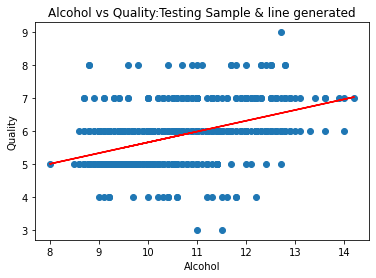




With Standardised data:
Mean Squared error =  0.63309 
Mean Absolute Error =  0.62905
Equation of the line:  y=0.389*x+5.82


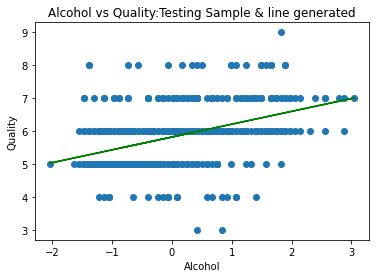




With Normalised data:
Mean Squared error =  0.63309 
Mean Absolute Error =  0.62905
Equation of the line:  y=0.389*x+5.82


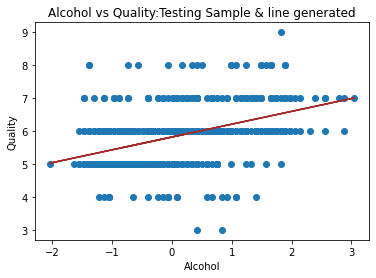

In [ ]:
def plot(Xi,model,c):
  plt.scatter(Xi,test_y)
  s="y="+str(round(model.coef_[0],3))+"*x+"+str(round(model.intercept_,3))
  print('Equation of the line: ',s)
  plt.plot(Xi,Xi*model.coef_+model.intercept_,color=c)  
  plt.title('Alcohol vs Quality:Testing Sample & line generated')  
  plt.xlabel('Alcohol')  
  plt.ylabel('Quality') 
  plt.show()
  print("\n")


#original data
lr=LinearRegression()
lr.fit(train_x,train_y)
y_pred=lr.predict(test_x)
MSE=round(metrics.mean_squared_error(test_y,y_pred),5)
MAE=round(metrics.mean_absolute_error(test_y,y_pred),5)
print("With Original data:\nMean Squared error = ",MSE,"\nMean Absolute Error = ",MAE)
plot(test_x,lr,"red")

#standardised data
lrs=LinearRegression()
lrs.fit(train_xs,train_y)
y_pred=lrs.predict(test_xs)
MSE=round(metrics.mean_squared_error(test_y,y_pred),5)
MAE=round(metrics.mean_absolute_error(test_y,y_pred),5)
print("\nWith Standardised data:\nMean Squared error = ",MSE,"\nMean Absolute Error = ",MAE)
plot(test_xs,lrs,"green")

#normalised data
lrn=LinearRegression()
lrn.fit(train_xn,train_y)
y_pred=lrs.predict(test_xn)
MSE=round(metrics.mean_squared_error(test_y,y_pred),5)
MAE=round(metrics.mean_absolute_error(test_y,y_pred),5)
print("\nWith Normalised data:\nMean Squared error = ",MSE,"\nMean Absolute Error = ",MAE)
plot(test_xn,lrn,"brown")



In [ ]:
def lineEQ(model):
  s="y="
  for i in range(len(model.coef_)):
    s=s+str(round(model.coef_[i],3))+"*x"+str(i)+"+"
  s=s+str(round(model.intercept_,3))
  print('Equation of the line: ',s)

LINEAR REGRESSION WITH MORE ATTRIBUTES

In [ ]:
features = ['pH','density','sulphates','free sulfur dioxide','total sulfur dioxide']#input values to the model-not all the attributes are chosen
print("Features Considered:'pH','density','sulphates','free sulfur dioxide','total sulfur dioxide'")
x=dataset[features]
y=dataset['quality'] 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.10,random_state=3,shuffle=True)
#Data Standardisation
std=StandardScaler()
train_xs=std.fit_transform(train_x)
test_xs=std.fit_transform(test_x)
#Data Normalisation
norm=Normalizer()
train_xn=std.fit_transform(train_x)
test_xn=std.fit_transform(test_x)

#original data
lr=LinearRegression()
lr.fit(train_x,train_y)
y_pred=lr.predict(test_x)
MSE=round(metrics.mean_squared_error(test_y,y_pred),5)
MAE=round(metrics.mean_absolute_error(test_y,y_pred),5)
print("With Original data:\nMean Squared error = ",MSE,"\nMean Absolute Error = ",MAE)
lineEQ(lr)

#standardised data
lrs=LinearRegression()
lrs.fit(train_xs,train_y)
y_pred=lrs.predict(test_xs)
MSE=round(metrics.mean_squared_error(test_y,y_pred),5)
MAE=round(metrics.mean_absolute_error(test_y,y_pred),5)
print("\nWith Standardised data:\nMean Squared error = ",MSE,"\nMean Absolute Error = ",MAE)
lineEQ(lrs)

#normalised data
lrn=LinearRegression()
lrn.fit(train_xn,train_y)
y_pred=lrs.predict(test_xn)
MSE=round(metrics.mean_squared_error(test_y,y_pred),5)
MAE=round(metrics.mean_absolute_error(test_y,y_pred),5)
print("\nWith Normalised data:\nMean Squared error = ",MSE,"\nMean Absolute Error = ",MAE)
lineEQ(lrn)



Features Considered:'pH','density','sulphates','free sulfur dioxide','total sulfur dioxide'
With Original data:
Mean Squared error =  0.67431 
Mean Absolute Error =  0.64127
Equation of the line:  y=-0.013*x0+-98.917*x1+0.737*x2+0.009*x3+-0.002*x4+103.814

With Standardised data:
Mean Squared error =  0.67418 
Mean Absolute Error =  0.64192
Equation of the line:  y=-0.002*x0+-0.295*x1+0.11*x2+0.156*x3+-0.108*x4+5.82

With Normalised data:
Mean Squared error =  0.67418 
Mean Absolute Error =  0.64192
Equation of the line:  y=-0.002*x0+-0.295*x1+0.11*x2+0.156*x3+-0.108*x4+5.82


LINEAR REGRESSION WITH ALL THE ATTRIBUTES

In [ ]:
features = ['fixed acidity','volatile acidity','citric acid','chlorides','alcohol','residual sugar','pH','density','sulphates','free sulfur dioxide','total sulfur dioxide']#input values to the model-not all the attributes are chosen
print("Features Considered:'fixed acidity','volatile acidity','citric acid','chlorides','alcohol',\n'residual sugar','pH','density','sulphates','free sulfur dioxide','total sulfur dioxide'\n")
x=dataset[features]
y=dataset['quality'] 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.10,random_state=3,shuffle=True)
#Data Standardisation
std=StandardScaler()
train_xs=std.fit_transform(train_x)
test_xs=std.fit_transform(test_x)
#Data Normalisation
norm=Normalizer()
train_xn=std.fit_transform(train_x)
test_xn=std.fit_transform(test_x)

#original data
lr=LinearRegression()
lr.fit(train_x,train_y)
y_pred=lr.predict(test_x)
MSE=round(metrics.mean_squared_error(test_y,y_pred),5)
MAE=round(metrics.mean_absolute_error(test_y,y_pred),5)
print("With Original data:\nMean Squared error = ",MSE,"\nMean Absolute Error = ",MAE)
lineEQ(lr)

#standardised data
lrs=LinearRegression()
lrs.fit(train_xs,train_y)
y_pred=lrs.predict(test_xs)
MSE=round(metrics.mean_squared_error(test_y,y_pred),5)
MAE=round(metrics.mean_absolute_error(test_y,y_pred),5)
print("\nWith Standardised data:\nMean Squared error = ",MSE,"\nMean Absolute Error = ",MAE)
lineEQ(lrs)

#normalised data
lrn=LinearRegression()
lrn.fit(train_xn,train_y)
y_pred=lrs.predict(test_xn)
MSE=round(metrics.mean_squared_error(test_y,y_pred),5)
MAE=round(metrics.mean_absolute_error(test_y,y_pred),5)
print("\nWith Normalised data:\nMean Squared error = ",MSE,"\nMean Absolute Error = ",MAE)
lineEQ(lrn)



Features Considered:'fixed acidity','volatile acidity','citric acid','chlorides','alcohol',
'residual sugar','pH','density','sulphates','free sulfur dioxide','total sulfur dioxide'

With Original data:
Mean Squared error =  0.56149 
Mean Absolute Error =  0.56667
Equation of the line:  y=0.061*x0+-1.324*x1+-0.125*x2+-0.643*x3+0.275*x4+0.042*x5+0.409*x6+-50.028*x7+0.779*x8+0.006*x9+-0.002*x10+50.922

With Standardised data:
Mean Squared error =  0.5615 
Mean Absolute Error =  0.56707
Equation of the line:  y=0.079*x0+-0.219*x1+-0.018*x2+-0.023*x3+0.327*x4+0.201*x5+0.066*x6+-0.149*x7+0.116*x8+0.102*x9+-0.137*x10+5.82

With Normalised data:
Mean Squared error =  0.5615 
Mean Absolute Error =  0.56707
Equation of the line:  y=0.079*x0+-0.219*x1+-0.018*x2+-0.023*x3+0.327*x4+0.201*x5+0.066*x6+-0.149*x7+0.116*x8+0.102*x9+-0.137*x10+5.82


LOGISTIC REGRESSION

*SINCE IT IS NOTED THAT STANDARDISED DATA AND NORMALISED DATA PERFORMED SLIGHTLY BETTER THAN USING THE ORIGINAL DATA, WE ARE USING NORMALISED DATA FOR LOGISTIC REGRESSION(with all the attributes)*

Precison= 80.33 
Recall= 29.35 
Accuracy= 54.15 



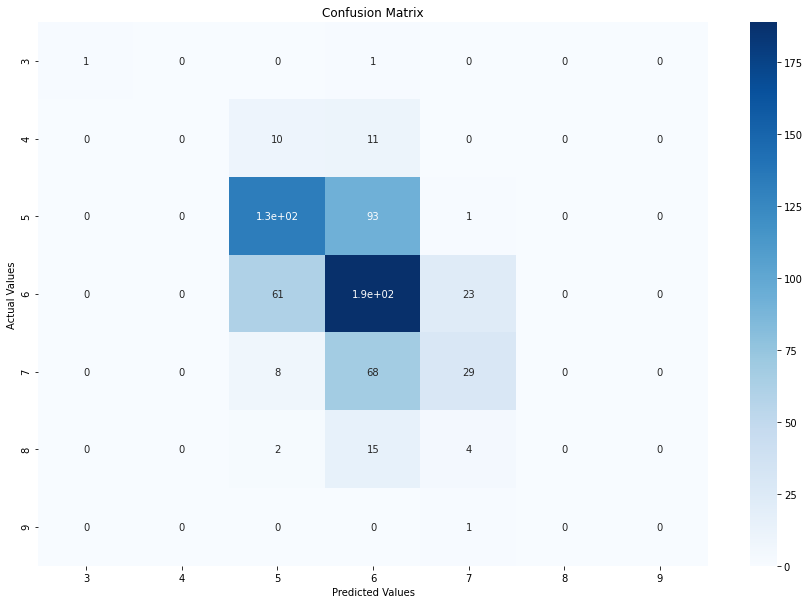

In [ ]:

def confusion(test_y,pred_y):
  cm=metrics.confusion_matrix(test_y,pred_y)
  #Datatframe to plot confusion matrix
  df=pd.DataFrame(cm,index=['3','4','5','6','7','8','9'],columns=['3','4','5','6','7','8','9'])
  plt.figure(figsize=(15,10))
  sns.heatmap(df,annot=True,cmap='Blues')
  st='Confusion Matrix'
  plt.title(st)
  plt.ylabel('Actual Values')
  plt.xlabel('Predicted Values')
  plt.show()
  print("\n")

Logr=LogisticRegression()
Logr.fit(train_xn,train_y)
pred_y=Logr.predict(test_xn)
acc=round(100*metrics.accuracy_score(test_y,pred_y),2)
pre=round(100*metrics.precision_score(test_y,pred_y,average='macro',zero_division=1),2)
rec=round(100*metrics.recall_score(test_y,pred_y,average='macro'),2)  
print("Precison=",pre,"\nRecall=",rec,"\nAccuracy=",acc,"\n")
confusion(test_y,pred_y)
